## 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
- SGD
- RMSprop
- AdaGrad
- Adam

In [1]:
import os
import keras
from keras.datasets import cifar10
import warnings
warnings.filterwarnings('ignore')

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

# 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [3]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [4]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
# 超參數設定
LEARNING_RATE = [1e-2, 1e-3, 1e-4]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]

In [6]:
results = {}

import itertools
for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.5f, Optimizer = %s" % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "EXP-LR-%s-Optimizer-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.01000, Optimizer = <class 'keras.optimizers.optimizer_v2.gradient_descent.SGD'>
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
______________

Epoch 50/50
196/196 [==============================] - 5s 23ms/step - loss: 1.2353 - accuracy: 0.5652 - val_loss: 1.3730 - val_accuracy: 0.5176
Experiment with LR = 0.01000, Optimizer = <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                 

Epoch 49/50
196/196 [==============================] - 8s 42ms/step - loss: 1.6787 - accuracy: 0.3963 - val_loss: 1.7815 - val_accuracy: 0.3754
Epoch 50/50
196/196 [==============================] - 9s 44ms/step - loss: 1.6764 - accuracy: 0.3979 - val_loss: 1.9697 - val_accuracy: 0.3268
Experiment with LR = 0.01000, Optimizer = <class 'keras.optimizers.optimizer_v2.adagrad.Adagrad'>
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
     

Epoch 48/50
196/196 [==============================] - 4s 20ms/step - loss: 1.0395 - accuracy: 0.6357 - val_loss: 1.6693 - val_accuracy: 0.4397
Epoch 49/50
196/196 [==============================] - 4s 20ms/step - loss: 1.0339 - accuracy: 0.6365 - val_loss: 1.3893 - val_accuracy: 0.5174
Epoch 50/50
196/196 [==============================] - 4s 20ms/step - loss: 1.0208 - accuracy: 0.6474 - val_loss: 1.4802 - val_accuracy: 0.4897
Experiment with LR = 0.01000, Optimizer = <class 'keras.optimizers.optimizer_v2.adam.Adam'>
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    

Epoch 47/50
196/196 [==============================] - 4s 20ms/step - loss: 1.4876 - accuracy: 0.4665 - val_loss: 1.6029 - val_accuracy: 0.4359
Epoch 48/50
196/196 [==============================] - 4s 20ms/step - loss: 1.4914 - accuracy: 0.4659 - val_loss: 1.5624 - val_accuracy: 0.4539
Epoch 49/50
196/196 [==============================] - 4s 20ms/step - loss: 1.4819 - accuracy: 0.4693 - val_loss: 1.6082 - val_accuracy: 0.4328
Epoch 50/50
196/196 [==============================] - 4s 20ms/step - loss: 1.4912 - accuracy: 0.4680 - val_loss: 1.6052 - val_accuracy: 0.4431
Experiment with LR = 0.00100, Optimizer = <class 'keras.optimizers.optimizer_v2.gradient_descent.SGD'>
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)  

Epoch 46/50
196/196 [==============================] - 4s 19ms/step - loss: 1.6926 - accuracy: 0.4108 - val_loss: 1.7004 - val_accuracy: 0.4063
Epoch 47/50
196/196 [==============================] - 4s 19ms/step - loss: 1.6891 - accuracy: 0.4112 - val_loss: 1.6963 - val_accuracy: 0.4104
Epoch 48/50
196/196 [==============================] - 4s 20ms/step - loss: 1.6857 - accuracy: 0.4127 - val_loss: 1.6938 - val_accuracy: 0.4113
Epoch 49/50
196/196 [==============================] - 4s 20ms/step - loss: 1.6825 - accuracy: 0.4138 - val_loss: 1.6899 - val_accuracy: 0.4117
Epoch 50/50
196/196 [==============================] - 4s 20ms/step - loss: 1.6792 - accuracy: 0.4141 - val_loss: 1.6892 - val_accuracy: 0.4074
Experiment with LR = 0.00100, Optimizer = <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None

Epoch 45/50
196/196 [==============================] - 5s 27ms/step - loss: 0.8330 - accuracy: 0.7016 - val_loss: 1.8412 - val_accuracy: 0.4778
Epoch 46/50
196/196 [==============================] - 5s 26ms/step - loss: 0.8130 - accuracy: 0.7094 - val_loss: 1.9771 - val_accuracy: 0.4769
Epoch 47/50
196/196 [==============================] - 5s 26ms/step - loss: 0.8030 - accuracy: 0.7115 - val_loss: 2.0383 - val_accuracy: 0.4784
Epoch 48/50
196/196 [==============================] - 5s 26ms/step - loss: 0.7992 - accuracy: 0.7109 - val_loss: 1.8160 - val_accuracy: 0.4966
Epoch 49/50
196/196 [==============================] - 5s 27ms/step - loss: 0.7815 - accuracy: 0.7187 - val_loss: 1.9768 - val_accuracy: 0.4830
Epoch 50/50
196/196 [==============================] - 5s 26ms/step - loss: 0.7717 - accuracy: 0.7237 - val_loss: 2.0894 - val_accuracy: 0.4965
Experiment with LR = 0.00100, Optimizer = <class 'keras.optimizers.optimizer_v2.adagrad.Adagrad'>
Model: "model"
_______________________

Epoch 44/50
196/196 [==============================] - 4s 20ms/step - loss: 1.5339 - accuracy: 0.4678 - val_loss: 1.5634 - val_accuracy: 0.4551
Epoch 45/50
196/196 [==============================] - 4s 21ms/step - loss: 1.5301 - accuracy: 0.4690 - val_loss: 1.5518 - val_accuracy: 0.4622
Epoch 46/50
196/196 [==============================] - 4s 20ms/step - loss: 1.5263 - accuracy: 0.4706 - val_loss: 1.5563 - val_accuracy: 0.4579
Epoch 47/50
196/196 [==============================] - 4s 20ms/step - loss: 1.5222 - accuracy: 0.4718 - val_loss: 1.5490 - val_accuracy: 0.4581
Epoch 48/50
196/196 [==============================] - 4s 20ms/step - loss: 1.5184 - accuracy: 0.4715 - val_loss: 1.5461 - val_accuracy: 0.4593
Epoch 49/50
196/196 [==============================] - 4s 20ms/step - loss: 1.5150 - accuracy: 0.4736 - val_loss: 1.5423 - val_accuracy: 0.4613
Epoch 50/50
196/196 [==============================] - 4s 20ms/step - loss: 1.5117 - accuracy: 0.4747 - val_loss: 1.5384 - val_accuracy:

Epoch 43/50
196/196 [==============================] - 4s 20ms/step - loss: 0.7584 - accuracy: 0.7262 - val_loss: 1.6068 - val_accuracy: 0.5184
Epoch 44/50
196/196 [==============================] - 4s 20ms/step - loss: 0.7319 - accuracy: 0.7359 - val_loss: 1.6289 - val_accuracy: 0.5254
Epoch 45/50
196/196 [==============================] - 4s 20ms/step - loss: 0.7154 - accuracy: 0.7424 - val_loss: 1.6849 - val_accuracy: 0.5242
Epoch 46/50
196/196 [==============================] - 4s 20ms/step - loss: 0.7115 - accuracy: 0.7439 - val_loss: 1.6469 - val_accuracy: 0.5237
Epoch 47/50
196/196 [==============================] - 4s 20ms/step - loss: 0.6991 - accuracy: 0.7482 - val_loss: 1.6693 - val_accuracy: 0.5183
Epoch 48/50
196/196 [==============================] - 4s 20ms/step - loss: 0.6827 - accuracy: 0.7534 - val_loss: 1.7177 - val_accuracy: 0.5209
Epoch 49/50
196/196 [==============================] - 4s 20ms/step - loss: 0.6709 - accuracy: 0.7602 - val_loss: 1.7540 - val_accuracy:

Epoch 42/50
196/196 [==============================] - 4s 19ms/step - loss: 2.0501 - accuracy: 0.2942 - val_loss: 2.0464 - val_accuracy: 0.3039
Epoch 43/50
196/196 [==============================] - 4s 19ms/step - loss: 2.0461 - accuracy: 0.2965 - val_loss: 2.0424 - val_accuracy: 0.3038
Epoch 44/50
196/196 [==============================] - 4s 19ms/step - loss: 2.0422 - accuracy: 0.2979 - val_loss: 2.0384 - val_accuracy: 0.3058
Epoch 45/50
196/196 [==============================] - 4s 19ms/step - loss: 2.0383 - accuracy: 0.2988 - val_loss: 2.0345 - val_accuracy: 0.3079
Epoch 46/50
196/196 [==============================] - 4s 19ms/step - loss: 2.0345 - accuracy: 0.3000 - val_loss: 2.0306 - val_accuracy: 0.3080
Epoch 47/50
196/196 [==============================] - 4s 19ms/step - loss: 2.0307 - accuracy: 0.3010 - val_loss: 2.0269 - val_accuracy: 0.3094
Epoch 48/50
196/196 [==============================] - 4s 21ms/step - loss: 2.0270 - accuracy: 0.3029 - val_loss: 2.0232 - val_accuracy:

Epoch 41/50
196/196 [==============================] - 5s 27ms/step - loss: 1.0500 - accuracy: 0.6355 - val_loss: 1.3820 - val_accuracy: 0.5184
Epoch 42/50
196/196 [==============================] - 5s 27ms/step - loss: 1.0396 - accuracy: 0.6394 - val_loss: 1.3892 - val_accuracy: 0.5192
Epoch 43/50
196/196 [==============================] - 5s 27ms/step - loss: 1.0333 - accuracy: 0.6417 - val_loss: 1.3707 - val_accuracy: 0.5181
Epoch 44/50
196/196 [==============================] - 5s 27ms/step - loss: 1.0255 - accuracy: 0.6429 - val_loss: 1.4270 - val_accuracy: 0.5070
Epoch 45/50
196/196 [==============================] - 5s 27ms/step - loss: 1.0078 - accuracy: 0.6483 - val_loss: 1.4321 - val_accuracy: 0.5081
Epoch 46/50
196/196 [==============================] - 5s 27ms/step - loss: 1.0018 - accuracy: 0.6519 - val_loss: 1.4309 - val_accuracy: 0.5100
Epoch 47/50
196/196 [==============================] - 5s 27ms/step - loss: 0.9899 - accuracy: 0.6556 - val_loss: 1.3871 - val_accuracy:

Epoch 40/50
196/196 [==============================] - 4s 20ms/step - loss: 1.9203 - accuracy: 0.3337 - val_loss: 1.9244 - val_accuracy: 0.3325
Epoch 41/50
196/196 [==============================] - 4s 20ms/step - loss: 1.9167 - accuracy: 0.3349 - val_loss: 1.9209 - val_accuracy: 0.3328
Epoch 42/50
196/196 [==============================] - 4s 20ms/step - loss: 1.9133 - accuracy: 0.3366 - val_loss: 1.9175 - val_accuracy: 0.3338
Epoch 43/50
196/196 [==============================] - 4s 20ms/step - loss: 1.9099 - accuracy: 0.3379 - val_loss: 1.9143 - val_accuracy: 0.3348
Epoch 44/50
196/196 [==============================] - 4s 20ms/step - loss: 1.9067 - accuracy: 0.3389 - val_loss: 1.9111 - val_accuracy: 0.3361
Epoch 45/50
196/196 [==============================] - 4s 20ms/step - loss: 1.9035 - accuracy: 0.3395 - val_loss: 1.9081 - val_accuracy: 0.3378
Epoch 46/50
196/196 [==============================] - 4s 20ms/step - loss: 1.9004 - accuracy: 0.3415 - val_loss: 1.9050 - val_accuracy:

Epoch 39/50
196/196 [==============================] - 4s 22ms/step - loss: 0.9273 - accuracy: 0.6784 - val_loss: 1.3095 - val_accuracy: 0.5457
Epoch 40/50
196/196 [==============================] - 4s 21ms/step - loss: 0.9242 - accuracy: 0.6784 - val_loss: 1.3484 - val_accuracy: 0.5379
Epoch 41/50
196/196 [==============================] - 4s 21ms/step - loss: 0.9101 - accuracy: 0.6861 - val_loss: 1.3092 - val_accuracy: 0.5452
Epoch 42/50
196/196 [==============================] - 4s 21ms/step - loss: 0.8889 - accuracy: 0.6931 - val_loss: 1.3446 - val_accuracy: 0.5408
Epoch 43/50
196/196 [==============================] - 4s 21ms/step - loss: 0.8838 - accuracy: 0.6945 - val_loss: 1.3434 - val_accuracy: 0.5452
Epoch 44/50
196/196 [==============================] - 4s 21ms/step - loss: 0.8662 - accuracy: 0.6997 - val_loss: 1.3685 - val_accuracy: 0.5408
Epoch 45/50
196/196 [==============================] - 4s 21ms/step - loss: 0.8558 - accuracy: 0.7036 - val_loss: 1.3359 - val_accuracy:

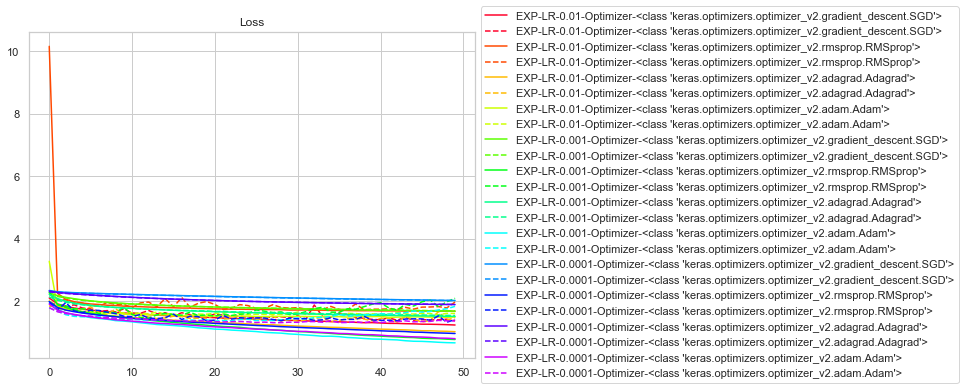

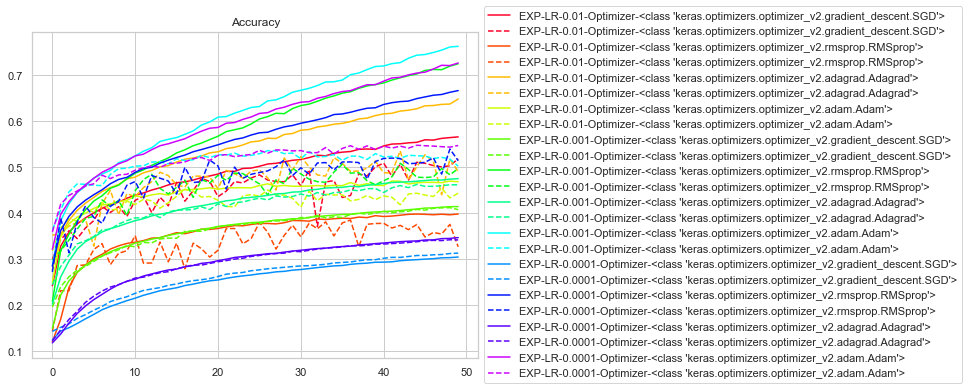

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()